In [1]:
# Library imports
import numpy as np
import pandas as pd

# Primary Dataset

In [2]:
# Read the dataset
df = pd.read_csv('../data/primary_dataset.csv')
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## Pre-processing

In [3]:
# Standardize column names
df.columns = ['rank', 'title', 'genres', 'description', 'director', 'actors', 'year', 'runtime', 'rating', 'votes', 'revenue', 'metascore']

# lowercase movie titles (will be easier to merge datasets later on)
df.title = df.title.map(str.lower)

# lowercase genres
df.genres = df.genres.map(str.lower)

df.head()

,rank,title,genres,description,director,actors,year,runtime,rating,votes,revenue,metascore
0,1,guardians of the galaxy,"action,adventure,sci-fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,prometheus,"adventure,mystery,sci-fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,split,"horror,thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,sing,"animation,comedy,family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,suicide squad,"action,adventure,fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## General statistics

In [4]:
df.describe()

,rank,year,runtime,rating,votes,revenue,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


## Ratings and Revenue

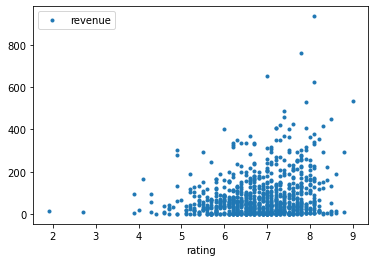

In [5]:
df.plot(x="rating", y="revenue", style=".")

From this plot, we can see individual facts about the distribution of the two attributes:

1. The ratings in this dataset are **rarely below 5**
2. The average revenue for a movie is **around 100 millions USD**, and those movies will tend to have a **rating between 6 and 8**.

Rating and revenue do not seem to be particularly correlated however. Hence, it is reasonable to use them as separate parameters representing a movie's success.

## Average revenue of the top 100 movies and the next top 100 movies

In [6]:
print("Average revenue of the top 100 movies:", df.head(100).revenue.mean())
print("Average revenue of the top 100-200 movies:", df.head(200).tail(100).revenue.mean())

Average revenue of the top 100 movies: 157.496043956044
Average revenue of the top 100-200 movies: 105.19988636363634


## Top 5 directors in the top 100

In [7]:
df.head(100).director.value_counts()[:5]

Christopher Nolan    4
Martin Scorsese      3
Joss Whedon          2
Denis Villeneuve     2
Tate Taylor          2
Name: director, dtype: int64

## Top 3 directors in the 10 most grossing movies

In [8]:
df.sort_values(by="revenue", ascending=False).head(10).director.value_counts()[:3]

Christopher Nolan    2
Joss Whedon          2
Colin Trevorrow      1
Name: director, dtype: int64

## Top 10 of popular actors

In [9]:
df.actors.str.split(',\s+', expand=True).stack().value_counts()[:10]

Mark Wahlberg         15
Brad Pitt             13
Hugh Jackman          13
Christian Bale        13
Michael Fassbender    12
Tom Hardy             12
Johnny Depp           11
Jake Gyllenhaal       11
Robert Downey Jr.     11
Channing Tatum        11
dtype: int64

# Secondary Dataset

In [10]:
# Read the dataset
df2 = pd.read_csv('../data/secondary_dataset.csv')

# We have the "\xa0" character at the end ofthe titles: we want to get rid of it
df2.movie_title = df2.movie_title.replace(u'\xa0', u'', regex=True)

# lowercase movie titles (will be easier to merge datasets later on)
df2.movie_title = df2.movie_title.map(str.lower)

df2.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Merged Datasets

In [11]:
# We want to get the movie budget, and the number of facebook likes for the movie and director
tmp = df.merge(df2[['movie_title', 'budget', 'movie_facebook_likes', 'director_facebook_likes']], left_on="title", right_on="movie_title")

# We did some analysis to cherry-pick the entries with conflicting director names
cherry_pick = [3, 22, 134, 168, 515, 516, 590, 620, 630, 631]

# Drop the cherry-picked entries to get the merged dataset
df3 = tmp.drop(tmp.index[cherry_pick])

df3.head()

,rank,title,genres,description,director,actors,year,runtime,rating,votes,revenue,metascore,movie_title,budget,movie_facebook_likes,director_facebook_likes
0,1,guardians of the galaxy,"action,adventure,sci-fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,guardians of the galaxy,170000000.0,96000,571.0
1,2,prometheus,"adventure,mystery,sci-fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,prometheus,130000000.0,97000,0.0
2,5,suicide squad,"action,adventure,fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,suicide squad,175000000.0,80000,452.0
4,18,jason bourne,"action,thriller",The CIA's most dangerous former operative is d...,Paul Greengrass,"Matt Damon, Tommy Lee Jones, Alicia Vikander,V...",2016,123,6.7,150823,162.16,58.0,jason bourne,120000000.0,31000,521.0
5,25,independence day: resurgence,"action,adventure,sci-fi",Two decades after the first Independence Day i...,Roland Emmerich,"Liam Hemsworth, Jeff Goldblum, Bill Pullman,Ma...",2016,120,5.3,127553,103.14,32.0,independence day: resurgence,165000000.0,67000,776.0


__Note:__ We have gone to **~671 entries** compared to **1'000** in the first dataset. This can be filled later by cherry-picking the conflicting entries from the backup dataset if the data is not sufficient (as proposed in the readme file).